<a href="https://colab.research.google.com/github/matthewpecsok/data_engineering/blob/main/tutorials/de_airflow_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setups

In [ ]:
!pip3 install -q apache-airflow
!pip install -q pyngrok
!pip install -q pandas
!pip install kafka-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 7.7 MB/s eta 0:00:

In [ ]:
import sqlite3
import pandas as pd
from pyngrok import ngrok

In [ ]:
port = 8082


## ngrok auth token

Replace this with your auth token

In [ ]:
!ngrok config add-authtoken 2MTTFNMd545b26JOziMmU8TphZx_5hff38U9KCaF5Gvrob1Bo

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!export SLUGIFY_USES_TEXT_UNIDECODE=yes
#!echo "\rload_examples = False" >> /root/airflow/airflow.cfg
!AIRFLOW_HOME="/root/airflow/"

## Initialize the airflow sqlite database

In [ ]:
!airflow db init

DB: sqlite:////root/airflow/airflow.db
[2023-06-20T15:11:23.969+0000] {migration.py:213} INFO - Context impl SQLiteImpl.
[2023-06-20T15:11:23.971+0000] {migration.py:216} INFO - Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running stamp_revision  -> c804e5c76e3e
WARNI [airflow.models.crypto] empty cryptography key - values will not be stored encrypted.
Initialization done


## Create your user

This will prompt you in the output for a password. Enter your password in the prompt when it asks.

In [ ]:
!airflow users create \
    --username admin \
    --firstname matt \
    --lastname pecsok \
    --role Admin \
    --email matthew.pecsok@utah.edu

/usr/local/lib/python3.10/dist-packages/flask_limiter/extension.py:293 UserWarning: Using the in-memory storage for tracking rate limits as no storage was explicitly specified. This is not recommended for production use. See: https://flask-limiter.readthedocs.io#configuring-a-storage-backend for documentation about configuring the storage backend.
[2023-06-20T15:11:35.436+0000] {manager.py:243} INFO - Inserted Role: Admin
[2023-06-20T15:11:35.474+0000] {manager.py:243} INFO - Inserted Role: Public
[2023-06-20T15:11:35.480+0000] {manager.py:853} WARNING - No user yet created, use flask fab command to do it.
[2023-06-20T15:11:35.631+0000] {manager.py:504} INFO - Created Permission View: can edit on Passwords
[2023-06-20T15:11:35.658+0000] {manager.py:562} INFO - Added Permission can edit on Passwords to role Admin
[2023-06-20T15:11:35.703+0000] {manager.py:504} INFO - Created Permission View: can read on Passwords
[2023-06-20T15:11:35.729+0000] {manager.py:562} INFO - Added Permission ca

## Open a ngrok tunnel to the HTTP server

Use the ngrok-free url to access airflow

In [ ]:
public_url = ngrok.connect(port).public_url
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}\"".format(public_url, port))

 * ngrok tunnel "https://d6dc-35-190-178-144.ngrok-free.app" -> "http://127.0.0.1:8082"


Using the ngrok link above use click visit site on the page that comes up (or potentially realize you didn't add your auth token. If so you will need to do so.



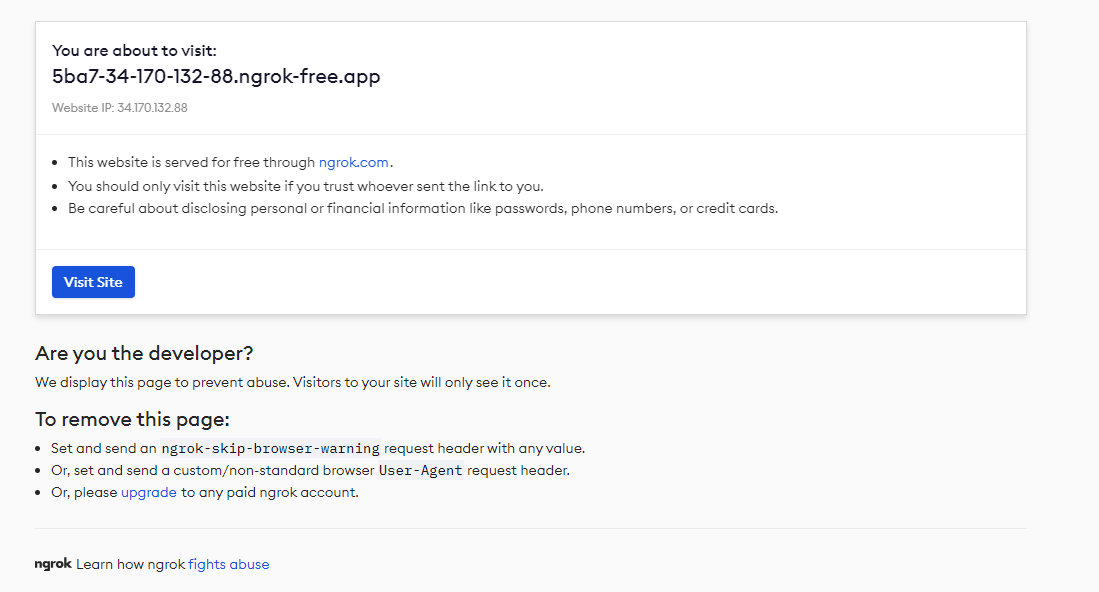

Enter

*   username: *admin*
*   password: *the password you created a moment ag*o




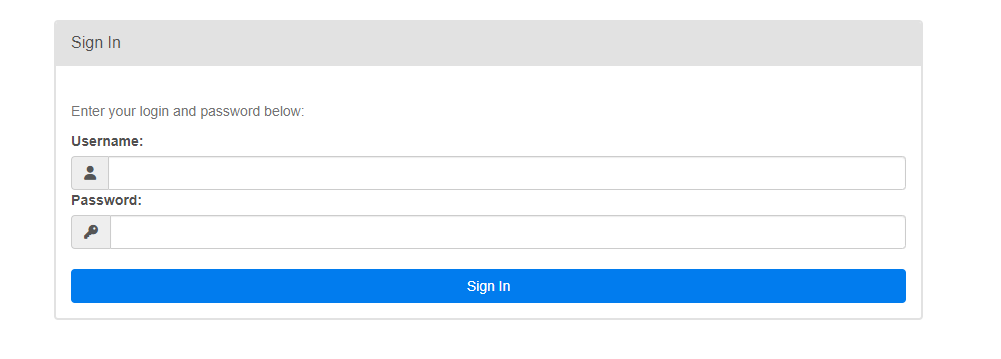

## Create a shell script for starting airflow

In [ ]:
%%writefile airflow_shell.sh

nohup airflow scheduler -D &
nohup airflow webserver -D --port 8082 --host 127.0.0.1 &

Writing airflow_shell.sh


In [ ]:
!chmod 755 airflow_shell.sh ## modify the file permissions for execute

In [ ]:
!./airflow_shell.sh & # start airflow webserver and scheduler

nohup: appending output to 'nohup.out'
nohup: appending output to 'nohup.out'


In [ ]:
!ps -ef | grep airflow

root        1180       1  0 15:11 ?        00:00:00 /usr/bin/python3 /usr/local/bin/airflow scheduler -D
root        1182       1  0 15:11 ?        00:00:00 /usr/bin/python3 /usr/local/bin/airflow webserver -D --port 8082 --host 127.0.0.1
root        1186     483  0 15:11 ?        00:00:00 /bin/bash -c ps -ef | grep airflow
root        1188    1186  0 15:11 ?        00:00:00 grep airflow


## remove all the example dags

In [ ]:
!rm -rf /usr/local/lib/python3.10/dist-packages/airflow/example_dags/example*.py
!rm -rf /usr/local/lib/python3.10/dist-packages/airflow/example_dags/tutorial*.py

## create some directories for dags and data

In [ ]:
!mkdir /root/airflow/dags/
!mkdir /root/airflow/data/

In [ ]:
#/usr/local/lib/python3.10/dist-packages/airflow/example_dags

## list DAGs and import errors

In [ ]:
!airflow dags list-import-errors # this lists import errors found in your DAG (if there are any)

No data found


In [ ]:
!airflow dags list # This lists all the DAGS in airflow.

No data found


# DAG1 Create your first hello world DAG

In [ ]:
%%writefile /usr/local/lib/python3.10/dist-packages/airflow/example_dags/hello_world_example.py

from airflow import DAG
from airflow.operators.python_operator import PythonOperator
from datetime import datetime

def say_hello():
    print("Hello, World! I'm your first airflow DAG and I executed successfully!")

with DAG('hello_world_example', start_date=datetime(2023, 6, 19), schedule_interval=None) as dag:
    task = PythonOperator(
        task_id='hello_task',
        python_callable=say_hello
    )



Writing /usr/local/lib/python3.10/dist-packages/airflow/example_dags/hello_world_example.py


In [ ]:
!airflow dags list # This lists all the DAGS in airflow.

dag_id              | filepath                                | owner   | paused
====================+=========================================+=========+=======
hello_world_example | /usr/local/lib/python3.10/dist-packages | airflow | None  
                    | /airflow/example_dags/hello_world_examp |         |       
                    | le.py                                   |         |       
                                                                                


# DAG2 Second  DAG. multi task.

This DAG has 3 tasks

1.   Read sample CSV file from github. Write the file to the local filesystem.
2.   Read the local CSV and add a new column in Pandas. Write back to filesystem as a new file.
3.   Connect to a new local sqlite database. Import CSV with new column into Pandas dataframe. Write the dataframe to a table.




In [ ]:
%%writefile /usr/local/lib/python3.10/dist-packages/airflow/example_dags/github.py

from airflow import DAG
from airflow.operators.python_operator import PythonOperator
from airflow.providers.http.hooks.http import HttpHook
from airflow.providers.sqlite.hooks.sqlite import SqliteHook
from datetime import datetime
import pandas as pd
import requests
from sqlalchemy import create_engine


default_args = {
    'start_date': datetime(2023, 6, 19),
    'retries': 1,
}

def fetch_csv_from_github():
    url = 'https://raw.githubusercontent.com/matthewpecsok/data_engineering/main/data/set_df_1.csv'
    response =  requests.get(url)
    with open('/root/airflow/data/file.csv', 'wb') as f:
        f.write(response.content)

def modify_csv():
    df = pd.read_csv('/root/airflow/data/file.csv')
    df['new_column'] = 'New Value'
    df.to_csv('/root/airflow/data/modified_file.csv', index=False)

def write_to_database():
    csv_path = '/root/airflow/data/modified_file.csv'
    table_name = 'my_table'
    conn_id = 'sqlite_default'

    df = pd.read_csv(csv_path)

    engine = create_engine(f'sqlite:///{conn_id}')
    with engine.connect() as conn:
        df.to_sql(table_name, conn, if_exists='replace', index=False)


with DAG('github_csv_example', default_args=default_args, schedule_interval=None) as dag:
    fetch_task = PythonOperator(
        task_id='fetch_csv_task',
        python_callable=fetch_csv_from_github
    )

    modify_task = PythonOperator(
        task_id='modify_csv_task',
        python_callable=modify_csv
    )

    write_task = PythonOperator(
      task_id='write_to_database_task',
      python_callable=write_to_database
    )

    fetch_task >> modify_task >> write_task

Writing /usr/local/lib/python3.10/dist-packages/airflow/example_dags/github.py


## Check our sqlite database

In [ ]:
con = sqlite3.connect('/sqlite_default')

In [ ]:
pd.read_sql_query("select * from my_table",con)

DatabaseError: ignored

In [ ]:
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'",con)

# DAG3 multi-data source

In this portion of the tutorial we will complicate things by having both a batch and streaming datasource.

We will use the original CSV datasource from DAG2, but we will also install kafka and have a streaming source. Airflow will handle pulling data from each and writing the output to the sqlite database we created in DAG2.

In [ ]:
%%writefile /usr/local/lib/python3.10/dist-packages/airflow/example_dags/kafka.py

from datetime import datetime, timedelta
from airflow import DAG
from airflow.operators.python_operator import PythonOperator
from kafka import KafkaConsumer
from kafka.structs import TopicPartition

default_args = {
    'owner': 'airflow',
    'start_date': datetime(2023, 1, 1),
    'retries': 1,
    'retry_delay': timedelta(seconds=5),
}

def consume_from_kafka():

    topic = 'sample-streaming-data'
    consumer = KafkaConsumer(
        'sample-streaming-data',
        bootstrap_servers='127.0.0.1:9092',
        auto_offset_reset='earliest',
        enable_auto_commit=True,
        group_id='my_consumer_group',
    )
    #consumer.assign([TopicPartition(topic, 0)])

    for message in consumer:
        print(f"Received message: {message.value}")

        message_str = message.value.decode('utf-8')
        with open('/root/airflow/data/kafka.txt', 'a') as f:
          f.write(f"Received message: {message_str}\n")

dag = DAG(
    'kafka_consumer',
    description='DAG to consume messages from Kafka topic when run',
    default_args=default_args,
)

consume_task = PythonOperator(
    task_id='consume_from_kafka',
    python_callable=consume_from_kafka,
    dag=dag,
)

Overwriting /usr/local/lib/python3.10/dist-packages/airflow/example_dags/kafka.py


In [ ]:
!curl -sSOL https://downloads.apache.org/kafka/3.4.1/kafka_2.12-3.4.1.tgz
!tar -xzf kafka_2.12-3.4.1.tgz

In [ ]:
!ls -l kafka*

-rw-r--r-- 1 root root 106809260 Jun 20 15:13 kafka_2.12-3.4.1.tgz

kafka_2.12-3.4.1:
total 64
drwxr-xr-x 3 root root  4096 May 26 01:41 bin
drwxr-xr-x 3 root root  4096 May 26 01:41 config
drwxr-xr-x 2 root root  4096 Jun 20 15:13 libs
-rw-r--r-- 1 root root 14910 May 26 01:40 LICENSE
drwxr-xr-x 2 root root  4096 May 26 01:41 licenses
-rw-r--r-- 1 root root 28184 May 26 01:40 NOTICE
drwxr-xr-x 2 root root  4096 May 26 01:41 site-docs


In [ ]:
!./kafka_2.12-3.4.1/bin/zookeeper-server-start.sh -daemon ./kafka_2.12-3.4.1/config/zookeeper.properties
!./kafka_2.12-3.4.1/bin/kafka-server-start.sh -daemon ./kafka_2.12-3.4.1/config/server.properties
!echo "Give the processes 10 seconds to start before proceeding."
!sleep 10

Give the processes 10 seconds to start before proceeding.


In [ ]:
!ps -ef | grep kafka

root        2135       1 15 15:14 ?        00:00:02 java -Xmx512M -Xms512M -server -XX:+UseG1GC -XX:MaxGCPauseMillis=20 -XX:InitiatingHeapOccupancyPercent=35 -XX:+ExplicitGCInvokesConcurrent -XX:MaxInlineLevel=15 -Djava.awt.headless=true -Xlog:gc*:file=/content/kafka_2.12-3.4.1/bin/../logs/zookeeper-gc.log:time,tags:filecount=10,filesize=100M -Dcom.sun.management.jmxremote -Dcom.sun.management.jmxremote.authenticate=false -Dcom.sun.management.jmxremote.ssl=false -Dkafka.logs.dir=/content/kafka_2.12-3.4.1/bin/../logs -Dlog4j.configuration=file:./kafka_2.12-3.4.1/bin/../config/log4j.properties -cp /content/kafka_2.12-3.4.1/bin/../libs/activation-1.1.1.jar:/content/kafka_2.12-3.4.1/bin/../libs/aopalliance-repackaged-2.6.1.jar:/content/kafka_2.12-3.4.1/bin/../libs/argparse4j-0.7.0.jar:/content/kafka_2.12-3.4.1/bin/../libs/audience-annotations-0.13.0.jar:/content/kafka_2.12-3.4.1/bin/../libs/commons-cli-1.4.jar:/content/kafka_2.12-3.4.1/bin/../libs/commons-lang3-3.8.1.jar:/content/kafka_2.1

In [ ]:
!./kafka_2.12-3.4.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic sample-streaming-data

Created topic sample-streaming-data.


In [ ]:
%%writefile generator.py

import sys
args = sys.argv  # a list of the arguments provided (str)
print("running generator.py", args)
iterations = int(args[1])
print(f'iterations: {iterations}')

def error_callback(exc):
    raise Exception('Error while sendig data to kafka: {0}'.format(str(exc)))

def write_to_kafka(topic_name, items):
  from kafka import KafkaProducer

  count=0
  producer = KafkaProducer(bootstrap_servers=['127.0.0.1:9092'])
  for message, key in items:
    producer.send(topic_name, key=key.encode('utf-8'), value=message.encode('utf-8'), partition=0).add_errback(error_callback)
    count+=1
  producer.flush()
  print("Wrote {0} messages into topic: {1}".format(count, topic_name))

import random
from time import sleep

def generate_data(rows=2):

  for i in range(1,rows):

    index_num = random.randint(0,1000000)
    print(index_num)
    keys = list([f'{index_num}'])
    msg = list([f'hello world!{index_num}'])
    data = zip(keys , msg)

  return data

for i in range(iterations):
  write_to_kafka("sample-streaming-data", generate_data())
  sleep(random.randint(0,10))



Writing generator.py


In [ ]:
%%script bash --bg

python generator.py 3